In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
cam = cv2.VideoCapture(0)
face_cas = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

f_01 = np.load('face_03.npy').reshape((20, 50*50*3))	# Aarnav
f_02 = np.load('face_02.npy').reshape((20, 50*50*3))	# Prateek
f_03 = np.load('face_01.npy').reshape((20, 50*50*3))	# Akul

print f_01.shape, f_02.shape, f_03.shape

names = {
    0: 'Akul',
    1: 'Prateek', 
    2: 'Aarnav',
}

labels = np.zeros((60, 1))
labels[:20, :] = 0.0 
labels[20:40, :] = 1.0
labels[40:, :] = 2.0

data = np.concatenate([f_01, f_02, f_03])
print data.shape, labels.shape

(20, 7500) (20, 7500) (20, 7500)
(60, 7500) (60, 1)


In [3]:
def dist(p1,p2):
    return np.sqrt((p1-p2).sum())

def KNN(x,train,target,K= 5):
    vals = []
    for ix in range(train.shape[0]):
        d = dist(train[ix],x)
        vals.append([d,target[ix]])
        print d, target[ix]
    vals = sorted(vals,key= lambda r:r[0])[:K]
    vals = np.asarray(vals)
    print vals
    freq = vals[:,1]
    freq = np.unique(freq,return_counts= True)
    print freq
    return freq[0][np.argmax(freq[1])]

911.241460865 [ 0.]
1052.982431 [ 0.]
1066.25278429 [ 0.]
1046.65180457 [ 0.]
1057.13007714 [ 0.]
1063.87076283 [ 0.]
1046.99761222 [ 0.]
955.570510219 [ 0.]
1068.58036665 [ 0.]
1040.01923059 [ 0.]
1056.39670579 [ 0.]
956.351922673 [ 0.]
1044.98516736 [ 0.]
1036.77432453 [ 0.]
1044.84927143 [ 0.]
1022.25290413 [ 0.]
971.338252104 [ 0.]
1064.31762177 [ 0.]
1042.34735093 [ 0.]
1043.89558865 [ 0.]
952.425850132 [ 1.]
963.159384526 [ 1.]
964.002074687 [ 1.]
965.909416043 [ 1.]
986.650900775 [ 1.]
979.769870939 [ 1.]
970.721896323 [ 1.]
984.804041421 [ 1.]
979.46260776 [ 1.]
980.973496074 [ 1.]
971.798847499 [ 1.]
967.770117332 [ 1.]
952.596451809 [ 1.]
975.702311158 [ 1.]
992.708416404 [ 1.]
987.144366342 [ 1.]
978.980592249 [ 1.]
987.902323107 [ 1.]
961.13058426 [ 1.]
965.069945652 [ 1.]
1062.66975115 [ 2.]
967.67659887 [ 2.]
918.623970948 [ 2.]
924.125532598 [ 2.]
977.702920114 [ 2.]
924.857826912 [ 2.]
924.634522392 [ 2.]
974.126275182 [ 2.]
921.977223146 [ 2.]
925.898482556 [ 2.]
966.1

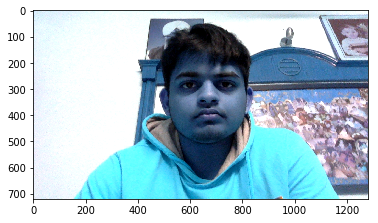

In [4]:
ret, frame = cam.read()
if ret == True :
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cas.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces :
        face_component = frame[y:y+h,x:x+w]
        fc = cv2.resize(face_component,(50,50))
        label = KNN(fc.flatten(),data,labels)
        plt.figure(0)
        plt.imshow(frame,cmap='gray')
        print names[label]
        plt.show()
else:
    print "error"

cv2.destroyAllWindows()
del cam